In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1506,spam,Thanks for the Vote. Now sing along with the s...,NaN,NaN,NaN
4698,ham,Yes fine,NaN,NaN,NaN
829,ham,Thanks for yesterday sir. You have been wonder...,NaN,NaN,NaN
5034,ham,How many times i told in the stage all use to ...,NaN,NaN,NaN
2897,ham,If you r @ home then come down within 5 min,NaN,NaN,NaN


In [5]:
df.shape


(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop the last 3 columns because there are a number of values present in the data

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
1628,ham,Yes princess! I want to make you happy...
4306,ham,I guess it is useless calling u 4 something im...
3888,ham,Unlimited texts. Limited minutes.
2390,ham,First has she gained more than &lt;#&gt; kg s...
4743,ham,"\Thinking of u ;) x\"""""


In [10]:
# rename the  columns

df.rename(columns={'v1':'target', 'v2':'text'} , inplace= True )

df.sample(5)

,target,text
4614,spam,Sunshine Quiz! Win a super Sony DVD recorder i...
4381,ham,yeah sure thing mate haunt got all my stuff so...
2083,ham,"you are sweet as well, princess. Please tell m..."
5515,ham,You are a great role model. You are giving so ...
5313,ham,My sister going to earn more than me da.


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
## First we will check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2. EDA Exploratory Data Analysis

In [17]:
# checking how many messages are spam and how many are ham

df.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

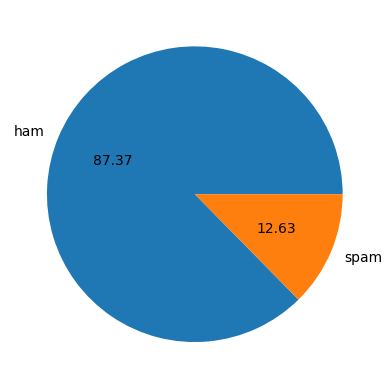

In [18]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [19]:
# Data is Imbalanced

In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Ankit
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Ankit
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [21]:
# Counting the number of characters
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# number of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# ham messages analysis
df[df['target'] == 0 ][['num_characters' , 'num_words' , 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# spam messages analysis
df[df['target'] == 1 ][['num_characters' , 'num_words' , 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

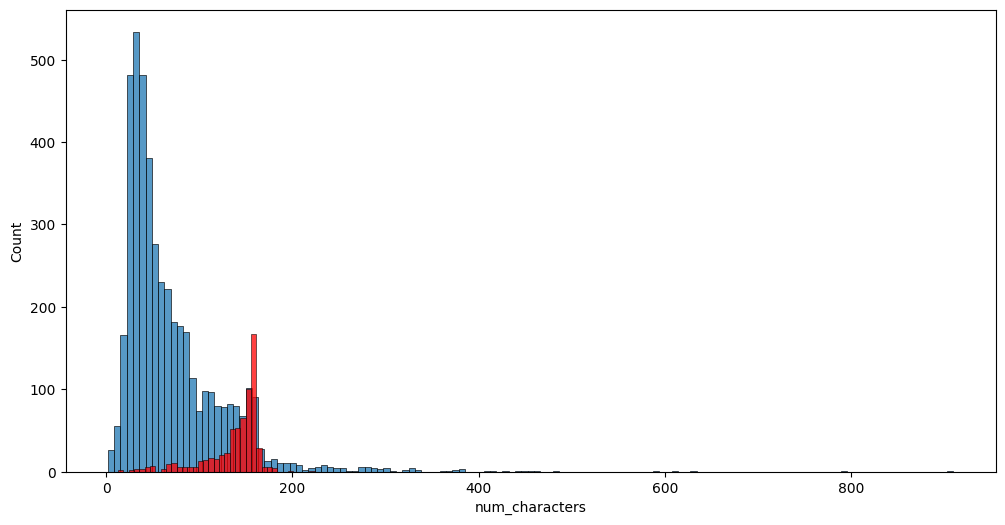

In [30]:
# plotting the histogram

import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

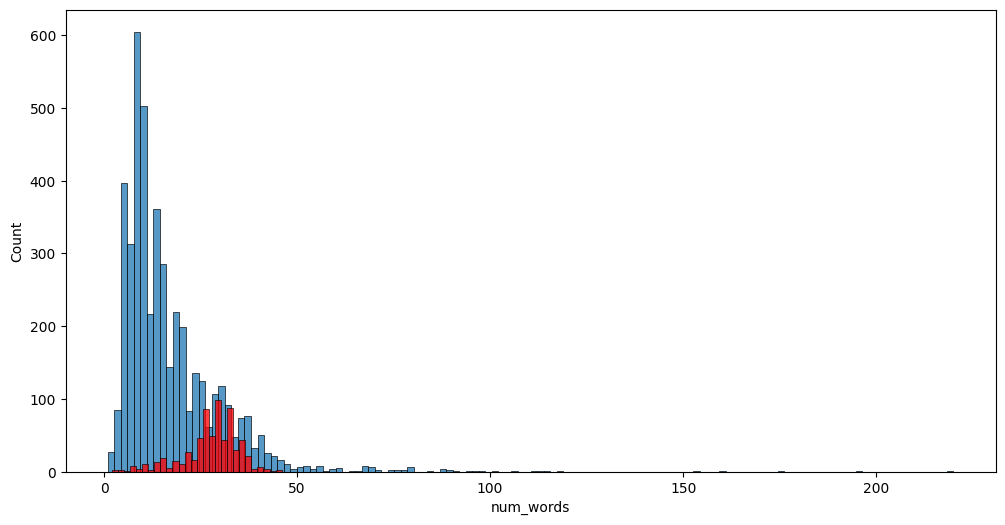

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

c:\Users\Ankit Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


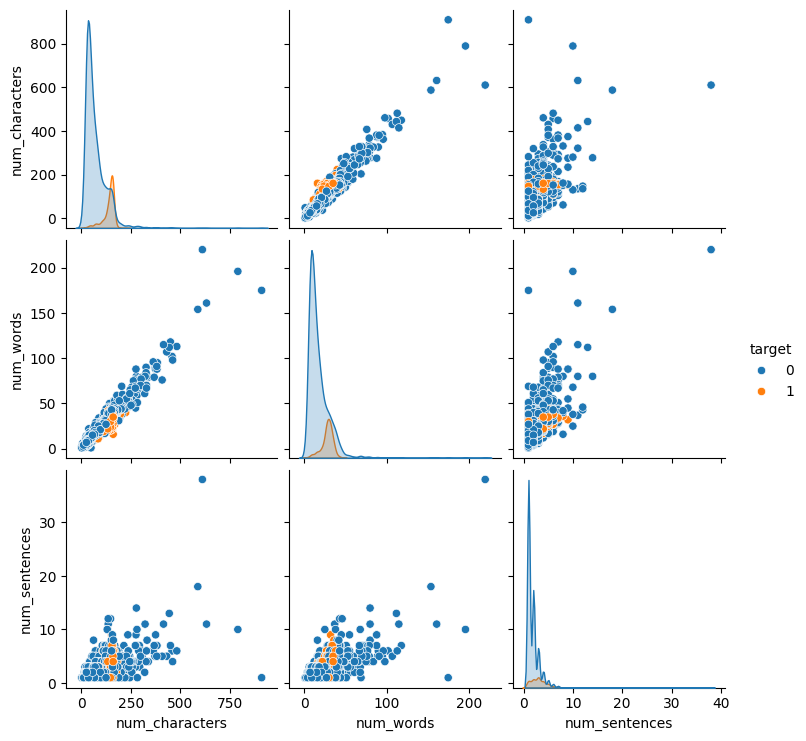

In [32]:
sns.pairplot(df, hue='target')

<Axes: >

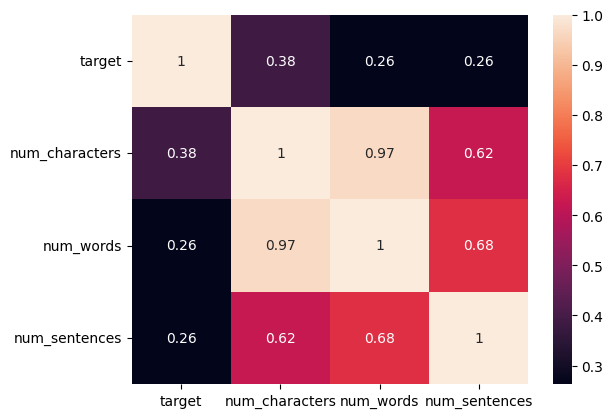

In [33]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [34]:
# Since the corr between the three columns is very high

# so we will be using only one that is num_characters for classification



# 3. Data Preprocessing


*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming










In [35]:

nltk.download('stopwords')
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps= PorterStemmer()


def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text :
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)


  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



[nltk_data] Downloading package stopwords to C:\Users\Ankit
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
transform_text('Did you like my presentation on ML?. Yes I liked your presentation')

'like present ml ye like present'

In [37]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [38]:
df['transform_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1 ]['transform_text'].str.cat(sep=" "))

(-0.5, 499.5, 499.5, -0.5)

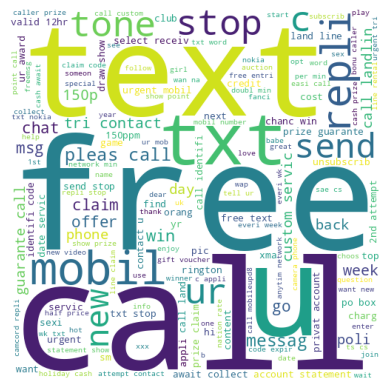

In [ ]:
plt.imshow(spam_wc)
plt.axis('off')

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0 ]['transform_text'].str.cat(sep=" "))

(-0.5, 499.5, 499.5, -0.5)

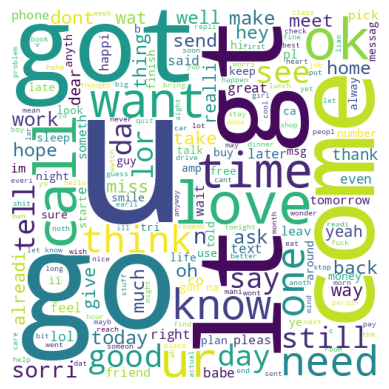

In [ ]:
plt.imshow(ham_wc)
plt.axis('off')

In [ ]:
# Displaying the top 30 words in each category
spam_corpus = []
for msg in df[df['target']==1 ]['transform_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)



In [ ]:
len(spam_corpus)

9939

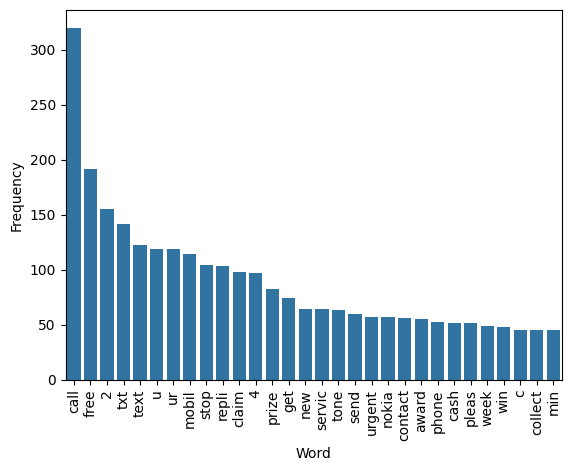

In [ ]:
from collections import Counter

# Convert the word counts to a DataFrame
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the DataFrame and specifying the x and y columns
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.show()

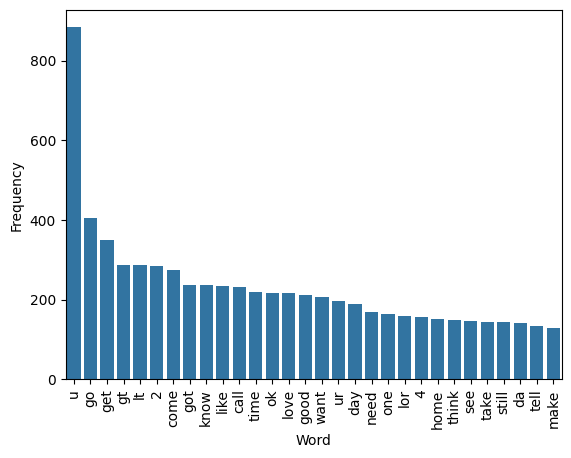

In [ ]:
ham_corpus = []
for msg in df[df['target']==0 ]['transform_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

# Convert the word counts to a DataFrame
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the bar plot using the DataFrame and specifying the x and y columns
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df)
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.show()

# 4. Model Building


### Naive Bayes Classifier


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer , TfidfVectorizer

cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(df['transform_text']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y= df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , precision_score

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [ ]:
# Using Gaussian NV
gnb.fit(x_train , y_train )
y_pred1 = gnb.predict(x_test)

print("Accuracy is : " , accuracy_score(y_test , y_pred1))
print("Precision Score is : " , precision_score(y_test , y_pred1))

print("Confusion Matrix : ")
print(confusion_matrix(y_test , y_pred1))

print()
print("Classification Report ")

print(classification_report(y_test , y_pred1))

Accuracy is :  0.8800773694390716
Precision Score is :  0.5315315315315315
Confusion Matrix : 
[[792 104]
 [ 20 118]]

Classification Report 
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034



In [ ]:
# Using Multinomial NV
mnb.fit(x_train , y_train )
y_pred2 = mnb.predict(x_test)

print("Accuracy is : " , accuracy_score(y_test , y_pred2))
print("Precision Score is : " , precision_score(y_test , y_pred2))

print("Confusion Matrix : ")
print(confusion_matrix(y_test , y_pred2))

print()
print("Classification Report ")

print(classification_report(y_test , y_pred2))

Accuracy is :  0.9642166344294004
Precision Score is :  0.8344370860927153
Confusion Matrix : 
[[871  25]
 [ 12 126]]

Classification Report 
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034



In [ ]:
# Using Multinomial NV
bnb.fit(x_train , y_train )
y_pred3 = bnb.predict(x_test)

print("Accuracy is : " , accuracy_score(y_test , y_pred3))
print("Precision Score is : " , precision_score(y_test , y_pred3))

print("Confusion Matrix : ")
print(confusion_matrix(y_test , y_pred3))

print()
print("Classification Report ")

print(classification_report(y_test , y_pred3))

Accuracy is :  0.9700193423597679
Precision Score is :  0.9734513274336283
Confusion Matrix : 
[[893   3]
 [ 28 110]]

Classification Report 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:

# MAKING OBJECTS FOR EACH MODEL

svc = SVC(kernel='sigmoid' , gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators = 50 , random_state=2)
abc = AdaBoostClassifier(n_estimators = 50 , random_state=2)
bc = BaggingClassifier(n_estimators = 50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators = 50 , random_state=2)
gbdt = GradientBoostingClassifier(n_estimators = 50 , random_state=2)
xgb = XGBClassifier(N_estimators = 50 , random_state=2)

In [ ]:
classifiers = {
    'SVC' : svc ,
    'KN' : knc ,
    'NB' : mnb ,
    'DT' : dtc ,
    'LR' : lrc,
    'RF' : rfc ,
    'AdaBoost' : abc ,
    'BgC' : bc ,
    'ETC' : etc ,
    'GBDT' : gbdt ,
    'xgb' : xgb
}



In [ ]:
def train_model(x_train , y_train , x_test , y_test , classifier):

  classifier.fit(x_train , y_train)
  y_pred = classifier.predict(x_test)

  accuracy = accuracy_score(y_test , y_pred)
  precision = precision_score(y_test , y_pred )

  return accuracy , precision


In [ ]:
train_model(x_train , y_train , x_test , y_test , svc )


(0.9264990328820116, 0.7421875)

In [ ]:
accuracy_scores= []
precision_scores= []

for name , classifier in classifiers.items():
  acc , prec = train_model(x_train , y_train , x_test , y_test , classifier)

  print("For Model ", name )
  print("Accuracy is  : ", acc)
  print("Precision is : ", prec)

  accuracy_scores.append(acc)
  precision_scores.append(prec)



For Model  SVC
Accuracy is  :  0.9264990328820116
Precision is :  0.7421875
For Model  KN
Accuracy is  :  0.9061895551257253
Precision is :  1.0
For Model  NB
Accuracy is  :  0.9642166344294004
Precision is :  0.8344370860927153
For Model  DT
Accuracy is  :  0.9264990328820116
Precision is :  0.9428571428571428
For Model  LR
Accuracy is  :  0.9709864603481625
Precision is :  0.9736842105263158
For Model  RF
Accuracy is  :  0.971953578336557
Precision is :  1.0
For Model  AdaBoost
Accuracy is  :  0.9197292069632496
Precision is :  0.9365079365079365
For Model  BgC
Accuracy is  :  0.9622823984526112
Precision is :  0.9159663865546218
For Model  ETC
Accuracy is  :  0.97678916827853
Precision is :  0.9913793103448276
For Model  GBDT
Accuracy is  :  0.9439071566731141
Precision is :  0.9444444444444444


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:42:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "N_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


For Model  xgb
Accuracy is  :  0.97678916827853
Precision is :  0.9672131147540983


In [ ]:
performances = pd.DataFrame({'Algorithm':classifiers.keys() , 'Accuracy': accuracy_scores , 'Precision': precision_scores})
performances.sort_values('Precision' , ascending = False)

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.976789,0.967213
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
6,AdaBoost,0.919729,0.936508
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


## Try to improve model performances

In [ ]:
tfidf = TfidfVectorizer(max_features = 3000)

x = tfidf.fit_transform(df['transform_text']).toarray()



In [ ]:
x.shape


(5169, 3000)

In [ ]:
y=df['target'].values

In [ ]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# splitting the new data
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [ ]:
accuracy_scores= []
precision_scores= []

for name , classifier in classifiers.items():
  acc , prec = train_model(x_train , y_train , x_test , y_test , classifier)

  print("For Model ", name )
  print("Accuracy is  : ", acc)
  print("Precision is : ", prec)

  accuracy_scores.append(acc)
  precision_scores.append(prec)

For Model  SVC
Accuracy is  :  0.9738878143133463
Precision is :  0.9747899159663865
For Model  KN
Accuracy is  :  0.90715667311412
Precision is :  1.0
For Model  NB
Accuracy is  :  0.9700193423597679
Precision is :  1.0
For Model  DT
Accuracy is  :  0.9352030947775629
Precision is :  0.8288288288288288
For Model  LR
Accuracy is  :  0.9526112185686654
Precision is :  0.9690721649484536
For Model  RF
Accuracy is  :  0.971953578336557
Precision is :  1.0
For Model  AdaBoost
Accuracy is  :  0.9206963249516441
Precision is :  0.8295454545454546
For Model  BgC
Accuracy is  :  0.9709864603481625
Precision is :  0.9508196721311475
For Model  ETC
Accuracy is  :  0.9729206963249516
Precision is :  1.0
For Model  GBDT
Accuracy is  :  0.9497098646034816
Precision is :  0.9888888888888889


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:46:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "N_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


For Model  xgb
Accuracy is  :  0.9671179883945842
Precision is :  0.9649122807017544


In [ ]:
temp = pd.DataFrame({'Algorithm':classifiers.keys() , 'Accuracy_3000': accuracy_scores , 'Precision_3000': precision_scores})
performances.sort_values('Precision' , ascending = False)
performances.merge(temp , on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_3000,Precision_3000
0,SVC,0.926499,0.742188,0.973888,0.974790
1,KN,0.906190,1.000000,0.907157,1.000000
2,NB,0.964217,0.834437,0.970019,1.000000
3,DT,0.926499,0.942857,0.935203,0.828829
4,LR,0.970986,0.973684,0.952611,0.969072
5,RF,0.971954,1.000000,0.971954,1.000000
6,AdaBoost,0.919729,0.936508,0.920696,0.829545
7,BgC,0.962282,0.915966,0.970986,0.950820
8,ETC,0.976789,0.991379,0.972921,1.000000
9,GBDT,0.943907,0.944444,0.949710,0.988889


In [ ]:
## VOTING CLASSIFICATIONS
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators = [('rf',rfc ) , ('etc' , etc ) , ('lr' , lrc)] , voting ='soft')

In [ ]:
voting.fit(x_train , y_train)

y_predv = voting.predict(x_test)


In [ ]:
print("For Voting Classifier : ")
print("Accuracy is : " , accuracy_score(y_test , y_predv))
print("Precision Score is : " , precision_score(y_test , y_predv))

For Voting Classifier : 
Accuracy is :  0.9700193423597679
Precision Score is :  1.0


In [ ]:
## Applying Stacking
from sklearn.ensemble import StackingClassifier
estimators =[('rf',rfc ) , ('etc' , etc ) , ('lr' , lrc)]
final_estimator = RandomForestClassifier()

In [ ]:
stk_classifier = StackingClassifier(estimators = estimators , final_estimator = final_estimator)

In [ ]:
stk_classifier.fit(x_train , y_train )




StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('etc',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2)),
                               ('lr',
                                LogisticRegression(penalty='l1',
                                                   solver='liblinear'))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_preds= stk_classifier.predict(x_test)

print("For Stacking Classifier : ")
print("Accuracy is : " , accuracy_score(y_test , y_preds))
print("Precision Score is : " , precision_score(y_test , y_preds))

For Stacking Classifier : 
Accuracy is :  0.9816247582205029
Precision Score is :  0.991869918699187


# Model Pickling

In [ ]:
# Saving the model
import pickle

pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(rfc , open('model.pkl' , 'wb'))

In [ ]:
## Making Predictions from the model
sample1 = df['text'][2]

def pred_sms(sample) :

    print("Message is : ", sample )
    text = transform_text(sample)
    vector_input = tfidf.transform([text])
    prediction = rfc.predict(vector_input)[0]

    print("------------------------------------------")
    if prediction == 1:
      print("                 Spam")

    else :
      print("                 Not Spam")


    print("------------------------------------------")



pred_sms(sample1)

Message is :  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
------------------------------------------
                 Spam
------------------------------------------


In [ ]:
pred_sms("Free entry in 2 a wkly comp to win FA Cup final")

Message is :  Free entry in 2 a wkly comp to win FA Cup final
------------------------------------------
                 Spam
------------------------------------------


In [ ]:
pred_sms("Hi, How are you")

Message is :  Hi, How are you
------------------------------------------
                 Not Spam
------------------------------------------


In [ ]:
pred_sms("SPECIAL OFFER 67% OFF | Pro Plan Claim Ankit, here is your idea for today!u")

Message is :  SPECIAL OFFER 67% OFF | Pro Plan Claim Ankit, here is your idea for today!u
------------------------------------------
                 Spam
------------------------------------------


In [ ]:
examples=["Hey Ankit, ready to get into details 67% OFF Special Offer ? Pro Plan Claim Now" ,
          "What’s the first thing viewers notice about your video? It’s not the title—it’s the thumbnail. 👍",
          "Expires in , discount ,pro , claim , discount 60% , discount OFF , 7 days $1/month for 3 months Redeem  For limited, $1/month for 3 months! B12 ",
          "Welcome back to your account If you suspect you were locked out of your account because of changes made by someone else, you should review & protect your account."
          ]

In [ ]:
for msg in examples:
  pred_sms(msg)

Message is :  Hey Ankit, ready to get into details 67% OFF Special Offer ? Pro Plan Claim Now
------------------------------------------
                 Spam
------------------------------------------
Message is :  What’s the first thing viewers notice about your video? It’s not the title—it’s the thumbnail. 👍
------------------------------------------
                 Not Spam
------------------------------------------
Message is :  Expires in , discount ,pro , claim , discount 60% , discount OFF , 7 days $1/month for 3 months Redeem  For limited, $1/month for 3 months! B12 
------------------------------------------
                 Spam
------------------------------------------
Message is :  Welcome back to your account If you suspect you were locked out of your account because of changes made by someone else, you should review & protect your account.
------------------------------------------
                 Not Spam
------------------------------------------
